---
# Machine Learning Analysis
---
### Goal
The objective of this deliverable is to compare the performance of two machine learning algorithms and one clustering model. To achieve this, I will utilize a dataset from Kaggle: the **World Air Quality Index by City and Coordinates**. This dataset contains numerical information that determines the Air Quality Index (AQI) of various regions worldwide. Using this data, I will build predictive models that estimate the air quality of a given region based on specific numeric inputs, helping to better understand the factors influencing air quality and predict it with greater accuracy.

### Machine Learning Models

##### 1. Support Vector Machine (SVM) with RBF Kernel
SVM (Support Vector Machine) with an RBF (Radial Basis Function) kernel is a supervised machine learning algorithm used for classification and regression tasks. The RBF kernel allows SVM to handle non-linear decision boundaries by mapping the input features into a higher-dimensional space. This will help us achieve our goal of predicting air quality by creating a model that can separate regions with different AQI levels effectively, even when the data is not linearly separable.

#### 2. Perceptron
The Perceptron is a type of artificial neural network and a linear classifier which works by updating weights in response to errors made in predictions. It differs from SVM with an RBF kernel in that it operates using a simpler approach that only handles linear decision boundaries unlike SVM's ability to work with non-linear boundaries using kernels. This model will help us achieve the goal by providing a more basic approach to classifying air quality regions which may work well when the data has a simpler pattern or linear separability.

#### 3. K-Means Clustering
K-Means clustering is an unsupervised machine learning algorithm used to group data points into clusters based on their similarity. In this task, K-Means was used to classify regions into different clusters based on air quality measures. The algorithm works by iteratively assigning each data point to the nearest cluster center (centroid) and updating the centroids based on the mean of the points assigned to each cluster.

#### Presentation Overview
These machine learning models will be trained using the air quality dataset, and their results will be compared based on their performance. Below, graphs displaying the results of all models will be shown to evaluate how well each model predicts the air quality of different regions.



---
## SVM
---

Classification Report:
                                precision    recall  f1-score   support

                          Good       0.99      0.98      0.98      2326
                     Hazardous       1.00      0.86      0.92        14
                      Moderate       0.97      0.99      0.98      2136
                     Unhealthy       0.88      0.99      0.93       251
Unhealthy for Sensitive Groups       0.97      0.84      0.90       244
                Very Unhealthy       0.90      0.74      0.81        38

                      accuracy                           0.97      5009
                     macro avg       0.95      0.90      0.92      5009
                  weighted avg       0.98      0.97      0.97      5009



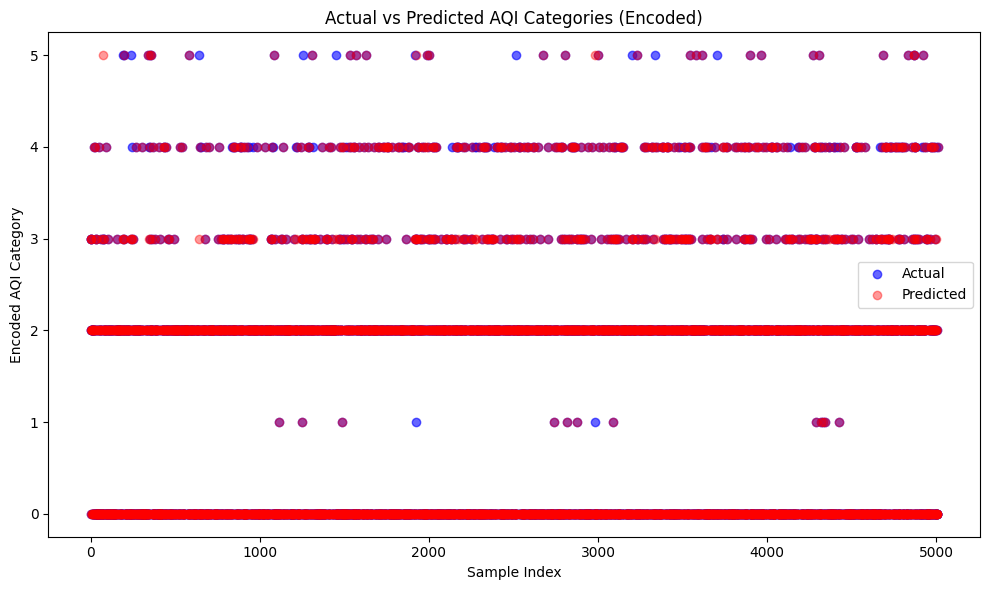


Label Encoding Mapping (Encoded Value -> AQI Category):
0 -> Good

1 -> Moderate

2 -> Unhealthy for Sensitive Groups

3 -> Unhealthy

4 -> Very Unhealthy

5 -> Hazardous

Overall Accuracy: 0.9744


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "AQI.csv"
df = pd.read_csv(file_path)

#data cleaning
numeric_cols = ['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value', 'lat', 'lng']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  #ensure numeric type
    df[col] = df[col].fillna(df[col].mean())           #fill missing values

#removing data with missing category classification
df = df.dropna(subset=['AQI Category'])

#get labels for encoding
label_encoder = LabelEncoder()
df['AQI Category Encoded'] = label_encoder.fit_transform(df['AQI Category'])

#get rid of the columns that are not needed
df = df.drop(columns=['Country', 'City', 'CO AQI Category', 'Ozone AQI Category',
                      'NO2 AQI Category', 'PM2.5 AQI Category', 'AQI Category'])

X = df[numeric_cols]
y = df['AQI Category Encoded']

#train and test splitting 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#training
clf = SVC(kernel='rbf', random_state=42)
clf.fit(X_train_scaled, y_train)

#prediction evaluation
y_pred = clf.predict(X_test_scaled)

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

#actual vs predicted plot
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', alpha=0.6, label='Actual')
plt.scatter(range(len(y_pred)), y_pred, color='red', alpha=0.4, label='Predicted')
plt.title("Actual vs Predicted AQI Categories (Encoded)")
plt.xlabel("Sample Index")
plt.ylabel("Encoded AQI Category")
plt.legend()
plt.tight_layout()
plt.show()

#legend
print("\nLabel Encoding Mapping (Encoded Value -> AQI Category):")
aqi_categories = ['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy', 'Hazardous']
for idx, label in enumerate(aqi_categories):
    print(f"{idx} -> {label}"+"\n")

accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {accuracy:.4f}")

---
## Perceptron
---

Classification Report:
                precision    recall  f1-score   support

          Good       0.88      0.72      0.79      2326
     Hazardous       0.00      0.00      0.00        38
      Moderate       0.65      0.84      0.73      2144
     Unhealthy       0.19      0.04      0.07       253
Very Hazardous       0.06      0.79      0.11        14
Very Unhealthy       0.60      0.23      0.33       234

      accuracy                           0.71      5009
     macro avg       0.40      0.44      0.34      5009
  weighted avg       0.72      0.71      0.70      5009

F1 Score (Weighted): 0.7000606244717537


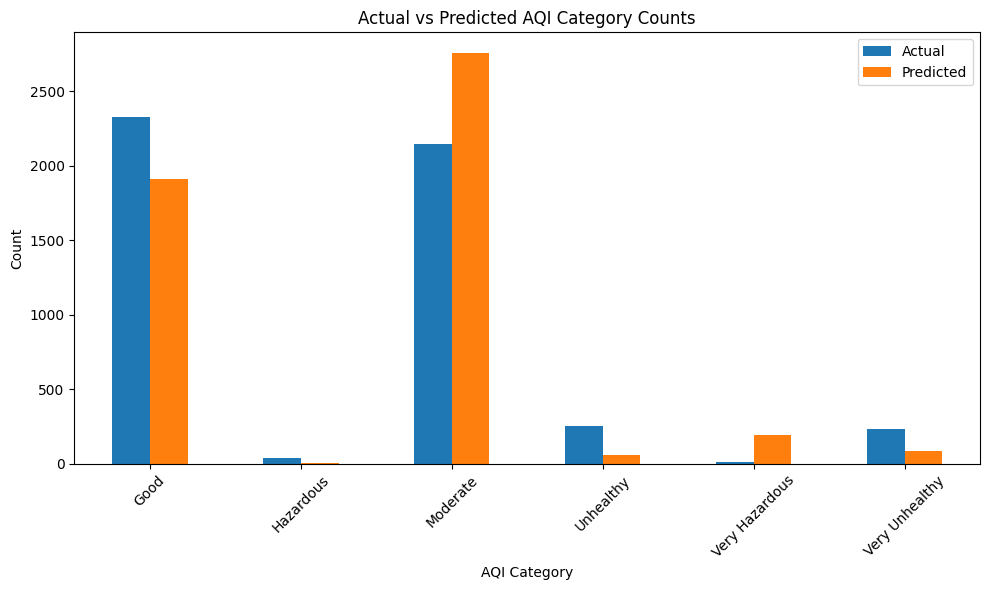

Accuracy: 0.7079257336793772


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

filePath = "AQI.csv"
dataFrame = pd.read_csv(filePath)

#clean up the data
numericColumns = ['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value', 'lat', 'lng']
for column in numericColumns:
    dataFrame[column] = pd.to_numeric(dataFrame[column], errors='coerce')  # convert to numbers
    dataFrame[column] = dataFrame[column].fillna(dataFrame[column].mean())  # fill missing values with the average

#drop rows with missing categories
dataFrame = dataFrame.dropna(subset=['AQI Category'])

#create AQI categories based on AQI value
bins = [0, 50, 100, 150, 200, 300, 500]
labels = ['Good', 'Moderate', 'Unhealthy', 'Very Unhealthy', 'Hazardous', 'Very Hazardous']
dataFrame['AQI Category'] = pd.cut(dataFrame['AQI Value'], bins=bins, labels=labels)

#categories into numbers
labelEncoder = LabelEncoder()
dataFrame['AQI Category Encoded'] = labelEncoder.fit_transform(dataFrame['AQI Category'])

features = dataFrame[numericColumns]
target = dataFrame['AQI Category Encoded']

#split the data into training and tsting
trainingFeatures, testingFeatures, trainingTarget, testingTarget = train_test_split(features, target, test_size=0.3, random_state=42)

#create and train the perceptron model
perceptronModel = Perceptron(random_state=42)
perceptronModel.fit(trainingFeatures, trainingTarget)

#make predictions using the trained model
predictedTarget = perceptronModel.predict(testingFeatures)

print("Classification Report:")
print(classification_report(testingTarget, predictedTarget, target_names=labelEncoder.classes_))

#F1 score
f1Score = f1_score(testingTarget, predictedTarget, average='weighted')
print(f"F1 Score (Weighted): {f1Score}")

#actual vs predicted 
actualCategoryCounts = pd.Series(testingTarget).value_counts().sort_index()
predictedCategoryCounts = pd.Series(predictedTarget).value_counts().sort_index()

#convert numeric categories back to labels
actualCategoryCounts.index = labelEncoder.inverse_transform(actualCategoryCounts.index)
predictedCategoryCounts.index = labelEncoder.inverse_transform(predictedCategoryCounts.index)

#create a plot
categoryCountPlot = pd.DataFrame({
    'Actual': actualCategoryCounts,
    'Predicted': predictedCategoryCounts
}).fillna(0)

categoryCountPlot.plot(kind='bar', figsize=(10, 6))
plt.title('Actual vs Predicted AQI Category Counts')
plt.xlabel('AQI Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#calculate accuracy of the model
accuracy = accuracy_score(testingTarget, predictedTarget)
print(f"Accuracy: {accuracy}")


---
## Results (SVM vs. Perceptron)
---
### General

The two models gave very different results. The **Perceptron** model correctly predicted about **71%** of the air quality values. However, it struggled with some less common categories like "Hazardous" and "Very Hazardous," where it made almost no accurate predictions.

In contrast, the **SVM with RBF kernel** performed significantly better, achieving about **97%** accuracy. It did well across all categories, especially the most common ones like "Good" and "Moderate," and even handled rare categories effectively.

### SVM's Edge

The SVM with RBF kernel outperformed the Perceptron because it can handle more complex and non-linear patterns in the data. While the Perceptron draws straight lines to separate categories, the SVM can draw flexible, curved lines that better reflect how the real-world air quality data is distributed. This makes SVM a more suitable and powerful model for accurately predicting air quality levels.

### Specifics

Looking more closely at the results, the **Support Vector Machine (SVM)** model clearly outperformed the **Perceptron** in both accuracy and F1 score across nearly all air quality categories.

- **Overall Accuracy:**
  - **SVM:** 97%
  - **Perceptron:** 71%
  - **Difference:** SVM outperformed the Perceptron by **26 percentage points**.

- **Weighted F1 Score:**
  - **SVM:** 0.97
  - **Perceptron:** 0.70
  - This means the SVM balanced precision and recall much more effectively than the Perceptron, leading to more reliable and consistent predictions.

- **Error Rate:**
  - **SVM Error Rate:** 3% (100% - 97%)
  - **Perceptron Error Rate:** 29% (100% - 71%)
  - The SVM made **26% fewer classification errors** than the Perceptron.

- **Category Performance (Examples):**
  - In the **"Hazardous"** category (38 test samples), the Perceptron failed completely with **0% precision, recall, and F1**, while the SVM achieved **100% precision** and **0.92 F1**.
  - In the **"Very Unhealthy"** category (only 14 test samples), the Perceptron scored a **0.06 precision** and **0.11 F1**, whereas the SVM scored **0.90 precision** and **0.81 F1**.

- **Reason for Struggles:**  
  Both models had more difficulty with the **"Very Unhealthy"** and **"Hazardous"** categories because the categories had the **lowest number of training samples**. This lack of data makes it harder for models—-especially simpler ones like Perceptron—-to learn the patterns needed to make accurate predictions.

These results show that not only is SVM better at handling complex decision boundaries, but it also deals more effectively with imbalanced datasets than the Perceptron.



---
## K-Means Clustering
---

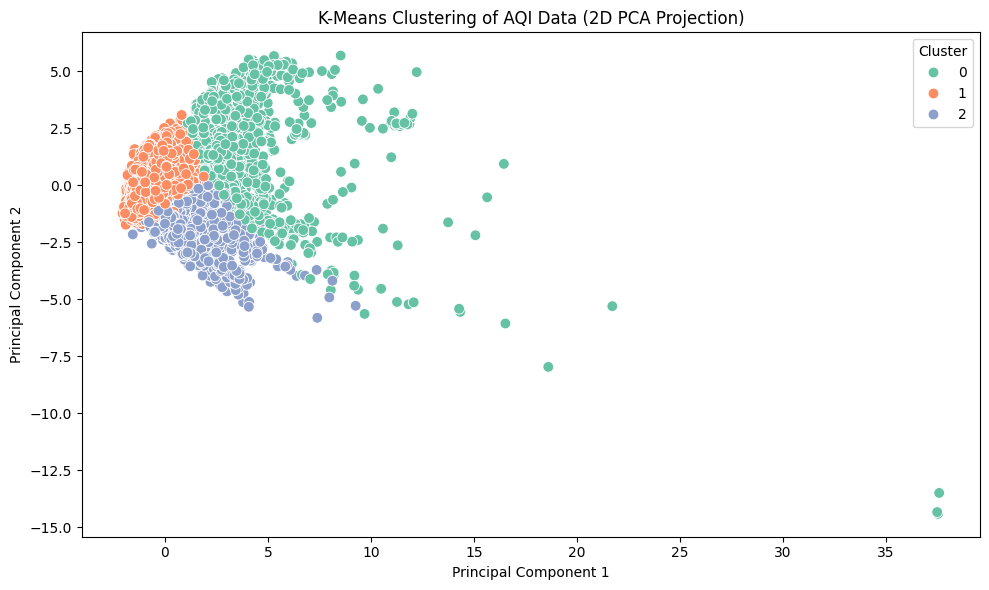

          AQI Value  CO AQI Value  Ozone AQI Value  NO2 AQI Value  \
Cluster                                                             
0        177.323627      3.911814        73.053245       5.038270   
1         48.655148      0.938316        31.164178       1.773591   
2         80.041451      2.110659        16.256477      12.963360   

         PM2.5 AQI Value        lat        lng  
Cluster                                         
0             169.564060  22.561044  75.032374  
1              45.237589  31.384264   3.223927  
2              80.039600  28.406934 -73.012337  


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#getting data
file_path = "AQI.csv"
df = pd.read_csv(file_path)

#cleaning data
numeric_cols = ['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value', 'lat', 'lng']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  #ensure numeric type
    df[col] = df[col].fillna(df[col].mean())           #fill missing values

#removing rows without a category
df = df.dropna(subset=['AQI Category'])

#getting featuers we want to cluster
X = df[numeric_cols]

#standardization 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Applying k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

#reducing dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#creating graph for visualization of clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='Set2', s=60)
plt.title("K-Means Clustering of AQI Data (2D PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

#gathering averages for clusters
df['Cluster'] = kmeans.labels_
cluster_avg_aqi = df.groupby('Cluster')[numeric_cols].mean()  # Adjust based on your relevant columns
print(cluster_avg_aqi)


---
# K-Means Clustering Results
---
In this project, K-Means clustering was applied to air quality index (AQI) data in order to categorize regions based on air pollutant levels (CO, Ozone, NO₂, PM2.5) and their geographical coordinates (latitude and longitude).

## Optimal Cluster Count

Initially, four clusters were used, but this led to **overfitting**, with one cluster overlapping significantly with another in both pollution levels and geographic location. After evaluating the cluster characteristics, it became evident that **three clusters provide a more meaningful and distinct separation** of the data. Reducing the number of clusters from four to three improves interpretability and ensures each group captures a unique pattern of air quality, avoiding unnecessary fragmentation of similar regions.

## Cluster Breakdown

### Cluster 0 – *Most Polluted Regions*
- **Average AQI**: 177.32  
- **CO AQI**: 3.91  
- **Ozone AQI**: 73.05  
- **NO₂ AQI**: 5.04  
- **PM2.5 AQI**: 169.56  
- **Location**: Latitude 22.56, Longitude 75.03  
- **Interpretation**: This cluster represents regions with **very poor air quality**, likely due to industrial activity or high population density. The high PM2.5 and Ozone levels suggest chronic pollution issues.

### Cluster 1 – *Cleanest Regions*
- **Average AQI**: 48.66  
- **CO AQI**: 0.94  
- **Ozone AQI**: 31.16  
- **NO₂ AQI**: 1.77  
- **PM2.5 AQI**: 45.24  
- **Location**: Latitude 31.38, Longitude 3.22  
- **Interpretation**: This cluster corresponds to areas with **the cleanest air**, likely rural or less-developed regions. All pollutant levels are relatively low, making these locations the healthiest in terms of air quality.

### Cluster 2 – *Moderately Polluted Regions*
- **Average AQI**: 80.04  
- **CO AQI**: 2.11  
- **Ozone AQI**: 16.26  
- **NO₂ AQI**: 12.96  
- **PM2.5 AQI**: 80.04  
- **Location**: Latitude 28.41, Longitude -73.01  
- **Interpretation**: This cluster reflects **moderate air quality**, with notably high NO₂ and PM2.5 levels. These regions may be influenced by traffic congestion or light industrial activities.

## Reflection and Insights

- **Clustering Performance**: With **three clusters**, the data segmentation is more natural and avoids unnecessary complexity. Each cluster now represents a clearly distinct category of air quality—severe, moderate, and clean—without redundant overlap.

- **Pollution Trends**: As expected, PM2.5 and Ozone AQI values are the strongest indicators of overall air quality degradation. The cleanest regions show consistently low levels across all pollutants.

- **Geographic Patterns**: High pollution clusters are geographically aligned with areas that are likely more industrialized or urban. Clean air clusters are located in regions that are less densely populated or further from emission sources.

## Conclusion

Using K-Means clustering with **three clusters** provided a more accurate and insightful grouping of air quality data. This approach effectively distinguishes between clean, moderate, and highly polluted regions, enhancing the utility of the model for environmental monitoring and policy decision-making. Attempting to use four clusters led to overfitting and decreased interpretability, reinforcing the importance of selecting an optimal number of clusters for meaningful analysis.
